In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import IPython.display as IPdisplay
import matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

save_folder = 'lorenz/lorenz-animation'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

sigma = 10 #eval(input("sigma: "))
b = 8/3 #eval(input("b: "))
r = 28 #eval(input("r: ))

init = [0.1, 0, 0] #[float(i) for i in input("initializations: ").split(",")]

t0 = 1
tn = 60
interval = 100
tp = np.linspace(t0, tn, tn*interval)

def lorenz_system(curr, t):
    x, y, z = curr
    return [sigma*(-x + y),
            r*x - y - x*z,
            -b*z + x*y]

def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.plot([0], [0], [0], color=(44/255, 176/255, 55/255), marker='*', label = (0, 0, 0))
    ax.plot([(b*(r - 1))**0.5], [(b*(r - 1))**0.5], [r - 1], color=(15/255, 165/255, 225/255), marker='*',
            label = tuple([round(float(i), 4) for i in ("%f, %f, %f"%((b*(r - 1))**0.5, (b*(r - 1))**0.5, r - 1)).split(",")]))
    ax.plot([(-b*(r - 1))**0.5], [(-b*(r - 1))**0.5], [r - 1], color=(165/255, 125/255, 220/255), marker='*',
            label = tuple([round(float(j), 4) for j in ("%f, %f, %f"%(-(b*(r - 1))**0.5, -(b*(r - 1))**0.5, r - 1)).split(",")]))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, bbox_to_anchor = (1.2, 0.5), loc = "center right")
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

def get_chunks(full_list, size):
    size = max(1, size)
    return [full_list[0:i] for i in range(1, len(full_list) + 1, size)]

chunks = get_chunks(tp, size=20)
points = [odeint(lorenz_system, init, chunk) for chunk in chunks]

for n, point in enumerate(points):
    plot_lorenz(point, n)

first_last = 100
standard_duration = 5
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'lorenz/animated-lorenz-attractor.gif'

gif = images[0]
gif.info['duration'] = durations
gif.info['loop'] = 0
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

IPdisplay.Image(url=gif_filepath)

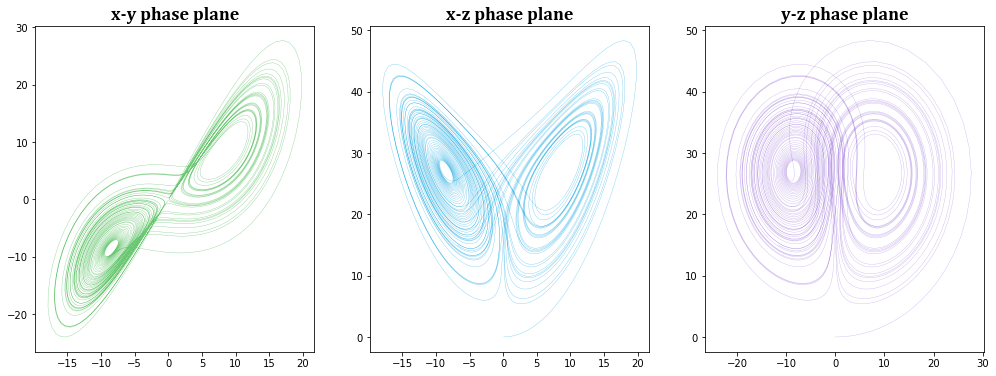

In [5]:
title_font = fm.FontProperties(family = 'Cambria', style='normal', size=18, weight='normal', stretch='normal')

xyz = odeint(lorenz_system, init, tp)
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig1, ax1 = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

ax1[0].plot(x, y, color=(44/255, 176/255, 55/255), alpha=0.7, linewidth=0.3)
ax1[0].set_title('x-y phase plane', fontproperties=title_font)

ax1[1].plot(x, z, color=(15/255, 165/255, 225/255), alpha=0.7, linewidth=0.3)
ax1[1].set_title('x-z phase plane', fontproperties=title_font)

ax1[2].plot(y, z, color=(165/255, 125/255, 220/255), alpha=0.7, linewidth=0.3)
ax1[2].set_title('y-z phase plane', fontproperties=title_font)

fig1.savefig('lorenz/lorenz-attractor-phase-planes.png', dpi=180, bbox_inches='tight')
plt.show()
plt.clf()

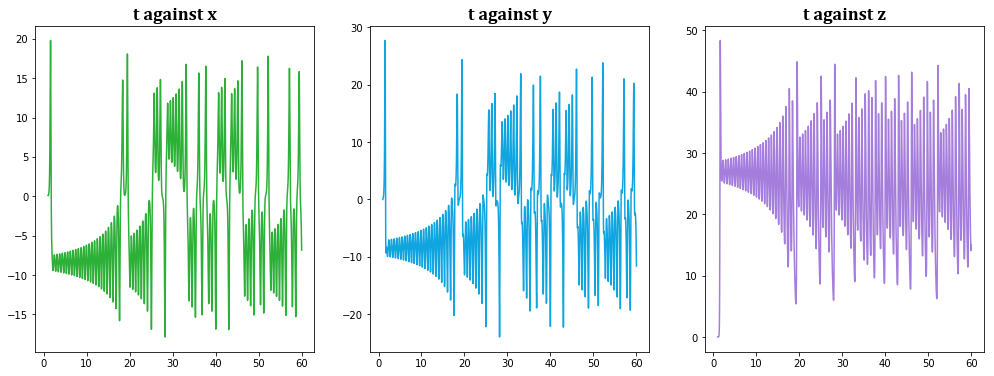

In [4]:
fig2, ax2 = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

ax2[0].plot(tp, x, color = (44/255, 176/255, 55/255))
ax2[0].set_title('t against x', fontproperties=title_font)

ax2[1].plot(tp, y, color = (15/255, 165/255, 225/255))
ax2[1].set_title('t against y', fontproperties=title_font)

ax2[2].plot(tp, z, color = (165/255, 125/255, 220/255))
ax2[2].set_title('t against z', fontproperties=title_font)

fig2.savefig('lorenz/lorenz-t-against-axes.png', dpi=180, bbox_inches='tight')
plt.show()
plt.clf()

In [10]:
def plottvx(x, t, code):
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111)
    ax.plot(t[:-1], x[:-1], color='g')
    ax.set_xlim((0,60))
    ax.set_ylim((-20,20))
    ax.axhline(linewidth = 0.8, color = 'black')
    plt.title("t against x", fontproperties=title_font)
    plt.savefig('{}/{}.png'.format('lorenz/tvx', (3-len(code))*"0" + code), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

x = xyz[:, 0]
for i in range(0, 6000, 20):
    plottvx(x[:i], tp[:i], str((i + 1)//20))

first_last = 100
standard_duration = 5
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

images = [Image.open(image) for image in glob.glob('{}/*.png'.format('lorenz/tvx'))]
gif_filepath = 'lorenz/animated-t-against-x.gif'

gif = images[0]
gif.info['duration'] = durations
gif.info['loop'] = 0
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

IPdisplay.Image(url=gif_filepath)